<a href="https://colab.research.google.com/github/youssef-gis/Los-Angeles-crimes-Analysis/blob/main/LA_crimes_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load and Prepare Crime Dataset

In [ ]:
import requests
link= "https://data.lacity.org/resource/2nrs-mtv8.csv?$limit=1005199"
request= requests.get(link)
request.raise_for_status()
with open("/content/drive/MyDrive/LA_crimes.csv", "wb") as file:
    file.write(request.content)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


la_crimes= pd.read_csv("/content/drive/MyDrive/LA_crimes.csv")

columns_to_drop = [ 'area','rpt_dist_no', 'part_1_2', 'crm_cd',  'mocodes',
        'premis_cd','weapon_used_cd', 'weapon_desc', 'status',  'crm_cd_1','dr_no',
       'crm_cd_2', 'crm_cd_3', 'crm_cd_4', 'cross_street']

df = la_crimes.drop(columns=columns_to_drop, axis=1)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005199 entries, 0 to 1005198
Data columns (total 13 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   date_rptd     1005199 non-null  object 
 1   date_occ      1005199 non-null  object 
 2   time_occ      1005199 non-null  int64  
 3   area_name     1005199 non-null  object 
 4   crm_cd_desc   1005199 non-null  object 
 5   vict_age      1005199 non-null  int64  
 6   vict_sex      860418 non-null   object 
 7   vict_descent  860406 non-null   object 
 8   premis_desc   1004611 non-null  object 
 9   status_desc   1005199 non-null  object 
 10  location      1005199 non-null  object 
 11  lat           1005199 non-null  float64
 12  lon           1005199 non-null  float64
dtypes: float64(2), int64(2), object(9)
memory usage: 99.7+ MB


In [10]:
# Convert TIME OCC to string, pad with leading zeros (e.g., 30 -> '0030')
time_str = df['time_occ'].astype(str).str.zfill(4)  # Ensures 4 digits (e.g., '0030')
df['time_occ']= pd.to_datetime(time_str.str[:2]+':'+time_str.str[2:], format='%H:%M')

df['date_rptd']= pd.to_datetime(df['date_rptd'], format='mixed')

df['date_occ']= pd.to_datetime(df['date_occ'].astype(str)+" "+df['time_occ'].dt.time.astype(str), format='mixed')


df = df.drop(columns="time_occ", axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005199 entries, 0 to 1005198
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   date_rptd     1005199 non-null  datetime64[ns]
 1   date_occ      1005199 non-null  datetime64[ns]
 2   area_name     1005199 non-null  object        
 3   crm_cd_desc   1005199 non-null  object        
 4   vict_age      1005199 non-null  int64         
 5   vict_sex      860418 non-null   object        
 6   vict_descent  860406 non-null   object        
 7   premis_desc   1004611 non-null  object        
 8   status_desc   1005199 non-null  object        
 9   location      1005199 non-null  object        
 10  lat           1005199 non-null  float64       
 11  lon           1005199 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 92.0+ MB


# Decoding the Victim Age Distribution

In [ ]:
#describe data
print(df.describe(include=['int64', 'float64']))

           vict_age           lat           lon
count  1.005199e+06  1.005199e+06  1.005199e+06
mean   2.891254e+01  3.399820e+01 -1.180909e+02
std    2.199378e+01  1.610548e+00  5.581809e+00
min   -4.000000e+00  0.000000e+00 -1.186676e+02
25%    0.000000e+00  3.401470e+01 -1.184305e+02
50%    3.000000e+01  3.405890e+01 -1.183225e+02
75%    4.400000e+01  3.416490e+01 -1.182739e+02
max    1.200000e+02  3.433430e+01  0.000000e+00


In [ ]:
#Handle Vict Age negative values
df_age= df[df['vict_age']>=1]
print(df_age['vict_age'].min())

2


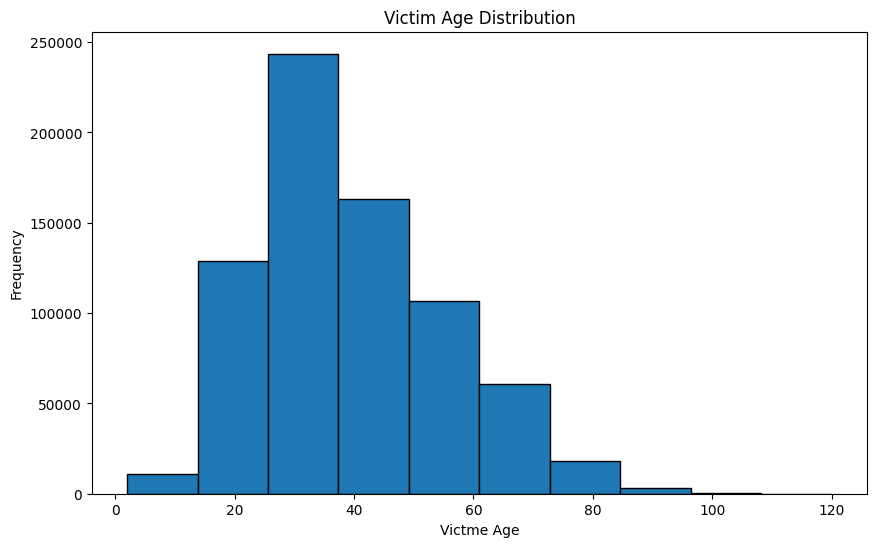

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_age['vict_age'].plot(kind='hist', edgecolor='black')
plt.xlabel('Victme Age')
plt.title('Victim Age Distribution')
plt.show()

## Interpretation of Victim Age Distribution
The histogram illustrates how crime victim ages are distributed across the dataset. Here's what stands out:

Peak Age Range:
The most common victim age group is between 25 and 35 years old, with this bin having the highest frequency around 240,000 incidents.

Young Victims (Under 20):
There's a noticeable number of victims in their teens, with a steep rise starting from age 15, suggesting a vulnerable younger population.

Middle-Aged Groups (35–55):
There's a gradual decline in frequency after age 35, though this group still makes up a significant portion of victims.

Older Victims (60+):
The frequency continues to decline but remains non-negligible, showing that elderly individuals are also affected by crime, albeit less frequently.
Outliers:
There are a few entries beyond age 100, which may be data entry errors or rare cases—these should be reviewed during data cleaning.

# Crime Trends Over Time

In [11]:
#Analyse Crime Trend Over Time
#Analyse Crime Trend Over Time
df_years= df[df['date_occ'].dt.year != 2025]#Since 2025 year has only 3 moths recorded
df_years['year_occured']= df_years['date_occ'].dt.year

df['month_occured']= df['date_occ'].dt.month
df['year_occured']= df['date_occ'].dt.year


<ipython-input-11-475e00e3e529>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_years['year_occured']= df_years['date_occ'].dt.year


In [7]:

plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(10, 6))
plt.subplot(1,2, 1)
plt.title("Crime Trend Over Years")
df_years['year_occured'].value_counts().sort_index().plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel("Years")
plt.ylabel("Crime Count")

plt.subplot(1,2, 2)
plt.title("Crime Trend Over Years and Months")
df.groupby(['year_occured', 'month_occured']).size().sort_index().plot(color='brown')
plt.xlabel("Year-Month")
plt.ylabel("Crime Count")
plt.tight_layout()
plt.show()

#Crime Count per Hour
crime_count_per_hour= df['date_occ'].dt.hour.value_counts()\
                                    .reset_index(name="crime_count").sort_index()
plt.figure(figsize=(10, 6))
plt.title("Crime Count per Hour")
plt.bar(crime_count_per_hour['date_occ'], crime_count_per_hour['crime_count'], edgecolor='black', color='orange')
plt.xlabel("Hour of the Day")
plt.ylabel("Crime Count")
plt.tight_layout()
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

# Time To report a crime

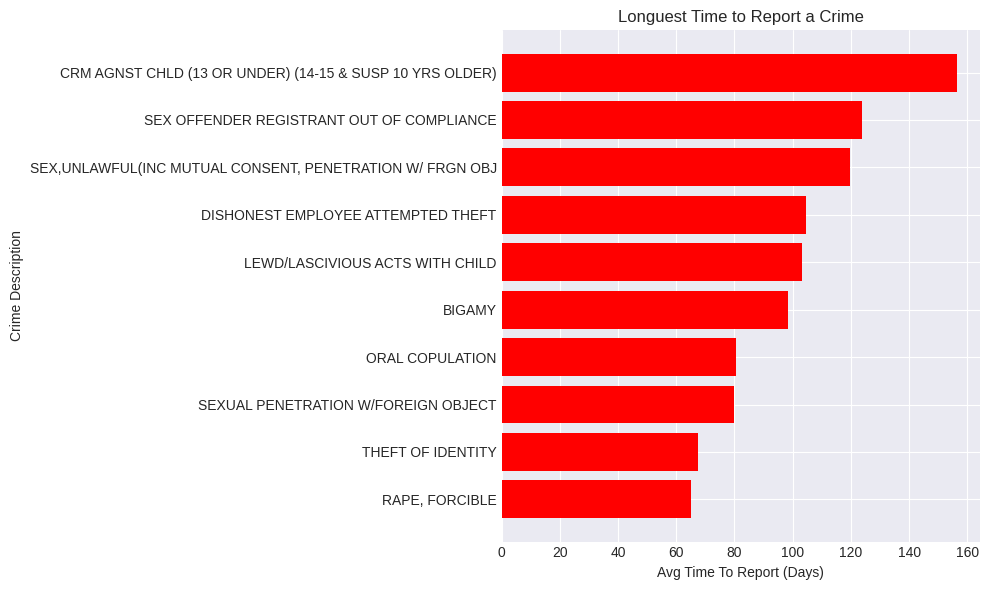

In [ ]:
#Longuest Time to report a crime
df['Time_To_Report'] = (df['date_rptd'] - df['date_occ']).dt.days
longuest_time_to_report= df.groupby(['crm_cd_desc'])['Time_To_Report'].mean()\
                  .reset_index(name='Avg_Time_To_Report').sort_values(by='Avg_Time_To_Report', ascending=False).head(10)

longuest_time_to_report.sort_values(by='Avg_Time_To_Report', ascending=True, inplace=True)
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(10, 6))
plt.title('Longuest Time to Report a Crime')
plt.barh(longuest_time_to_report['crm_cd_desc'], longuest_time_to_report['Avg_Time_To_Report'], color='red')
plt.xlabel("Avg Time To Report (Days)")
plt.ylabel("Crime Description")
plt.tight_layout()
plt.show()


Key Findings:

Crimes against children (such as “Crimes Against Child (13 or Under)”) show the longest average reporting delay — around 156 days.

Sex-related crimes (like “Sex Offender Registrant Out of Compliance”, “Unlawful Sex Acts”, “Lewd Acts with Child”, “Oral Copulation”, and “Sexual Penetration with Foreign Object”) dominate the list, often taking over 100 days to report.

Crimes like Bigamy and Identity Theft also exhibit significant reporting delays.

This pattern suggests that crimes involving personal trauma, fear of stigma, complicated legal procedures, or lack of immediate discovery (such as identity theft) often take much longer to come to light.

# Exploring Categorical Columns: Crime Descriptions and Area Names


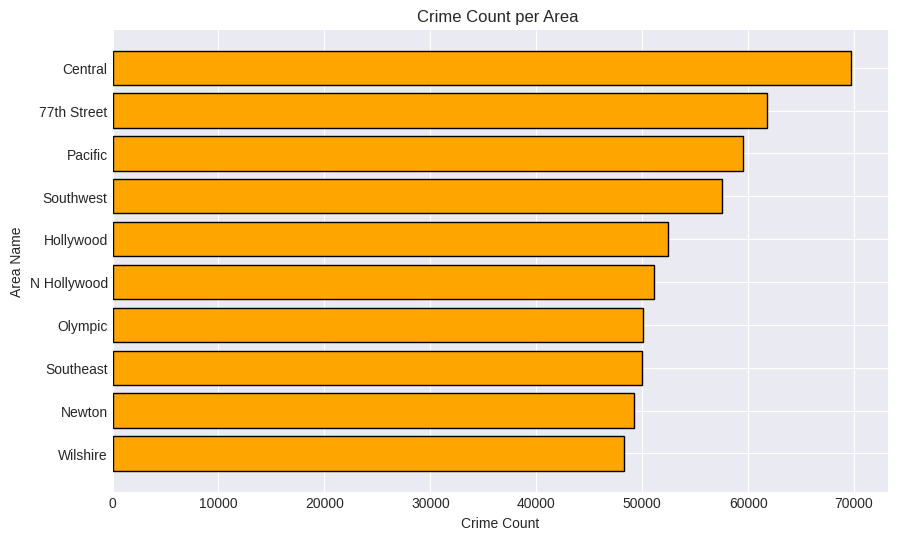

In [ ]:
crime_count_per_area= df.groupby(['area_name'])['crm_cd_desc'].count()\
                        .reset_index(name='crime_count').sort_values(by='crime_count', ascending=False).head(10)

crime_count_per_area.sort_values(by='crime_count', ascending=True, inplace=True)

plt.figure(figsize=(10, 6))
plt.title("Crime Count per Area ")
plt.barh(crime_count_per_area['area_name'], crime_count_per_area['crime_count'], edgecolor='black', color='orange')
plt.xlabel("Crime Count")
plt.ylabel("Area Name")
plt.show()

## Crime Patterns During Nighttime Hours

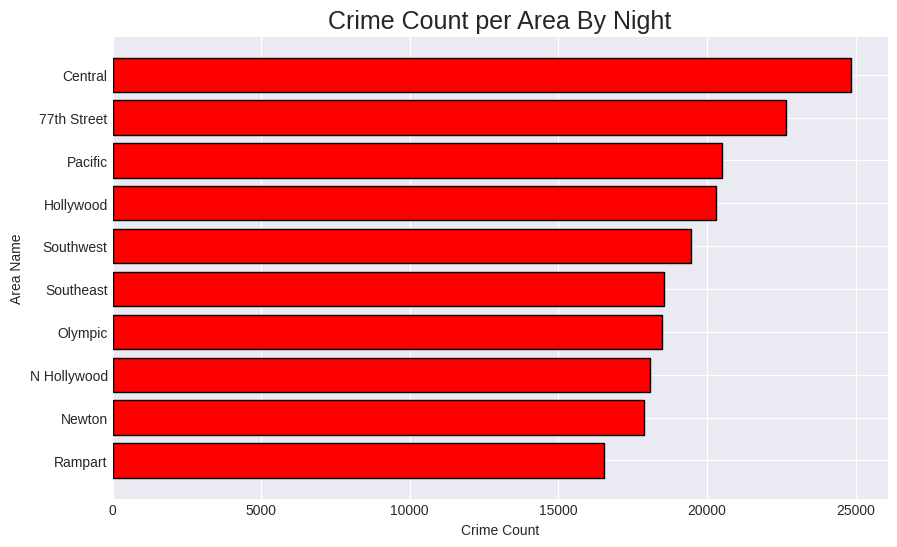

In [ ]:
crime_during_night= df[(df['date_occ'].dt.hour >= 20) | (df['date_occ'].dt.hour <= 5)]
area_crime_by_night= crime_during_night.groupby(['area_name'])['crm_cd_desc'].count()\
                    .reset_index(name='crime_count').sort_values(by='crime_count', ascending=False).head(10)

area_crime_by_night.sort_values(by='crime_count', ascending=True, inplace=True)

plt.figure(figsize=(10, 6))
plt.title("Crime Count per Area By Night", fontsize=18)
plt.barh(area_crime_by_night['area_name'], area_crime_by_night['crime_count'], edgecolor='black', color='red')
plt.xlabel("Crime Count")
plt.ylabel("Area Name")
plt.show()

# Mapping Crime Distribution Across LA

In [14]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap
gdf= gpd.GeoDataFrame(df_years, geometry=gpd.points_from_xy(df_years['lon'], df_years['lat']))
gdf_2020=gdf[gdf['year_occured']==2020]
gdf_2020_coordinates= [[point.xy[1][0], point.xy[0][0]] for point in gdf_2020.geometry]

crime_count_per_area= df.groupby(['area_name']).agg({'crm_cd_desc':'count', 'lat':'median',
                                  'lon':'median'}).reset_index().sort_values(by='crm_cd_desc', ascending=False)

crime_count_per_area_locations=gpd.GeoDataFrame(crime_count_per_area,geometry=gpd.points_from_xy(crime_count_per_area['lon'],crime_count_per_area['lat']))

# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in crime_count_per_area_locations.geometry]

# OpenStreetMap
map = folium.Map(location=[34.0608, -118.3004], tiles=None, zoom_start=12)

# Iterate through list and add a marker for each volcano, color-coded by its type.
i = 0
tileLayer= folium.TileLayer(tiles="openstreetmap", control=False)
tileLayer.add_to(map)

featureGroup1= folium.FeatureGroup(name='Crime Count')
featureGroup2= folium.FeatureGroup(name='Crime Commited during 2020')

for coordinates in geo_df_list:
    # Place the markers with the popup labels and data
    featureGroup1.add_child(
        folium.Marker(
            location=coordinates,
            popup= folium.Popup("Area Name: "
            + str(crime_count_per_area_locations.area_name[i])
            + "<br>"
            + "Crime Count: "
            + str(crime_count_per_area_locations.crm_cd_desc[i]), max_width=150),
            icon=folium.Icon(color="blue" ),
        )
    )
    i = i + 1





In [32]:
from folium.plugins import HeatMap

In [35]:
HeatMap(data=gdf_2020_coordinates,show=False).add_to(map)

In [29]:
featureGroup1.add_to(map)
featureGroup2.add_to(map)
folium.LayerControl().add_to(map)

In [36]:
map

KeyboardInterrupt: 